### Импорт библиотек 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import io
import re

### Загружаем датасет 

In [3]:
df = pd.read_csv('dataset.txt', sep = ',')
df.head()

,request_id,date,sector,client_request,commercial_proposal,budget_est,status
0,R-1001,2023-09-01,Web Dev,I need a WordPress landing page for my flower ...,Turnkey WP site + hosting setup + 1h training.,$800,Accepted
1,R-1002,2023-09-02,Design,Need a minimalist logo for a tech startup call...,"3 logo concepts, vector files, and favicon inc...",$450,Pending
2,R-1003,2023-09-02,Translation,Translate a 5-page legal contract from English...,Certified translation by a native jurist. 48h ...,$0.15/word,Accepted
3,R-1004,2023-09-03,Content,Write 4 SEO-optimized articles about 'Solar En...,Content Pack: Keyword research + 4 articles + ...,$600,Negotiating
4,R-1005,2023-09-04,Data,Scrape email addresses from 500 LinkedIn profi...,Lead generation service: formatted CSV deliver...,$250,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   request_id           100 non-null    object
 1   date                 100 non-null    object
 2   sector               100 non-null    object
 3   client_request       100 non-null    object
 4   commercial_proposal  100 non-null    object
 5   budget_est           100 non-null    object
 6   status               100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [5]:
df.isnull().sum()

request_id             0
date                   0
sector                 0
client_request         0
commercial_proposal    0
budget_est             0
status                 0
dtype: int64

### Приводим целевую переменную к числовым данным

In [6]:
encoder = LabelEncoder()
df['status_encoded'] = encoder.fit_transform(df['status'])
df.head()

,request_id,date,sector,client_request,commercial_proposal,budget_est,status,status_encoded
0,R-1001,2023-09-01,Web Dev,I need a WordPress landing page for my flower ...,Turnkey WP site + hosting setup + 1h training.,$800,Accepted,0
1,R-1002,2023-09-02,Design,Need a minimalist logo for a tech startup call...,"3 logo concepts, vector files, and favicon inc...",$450,Pending,2
2,R-1003,2023-09-02,Translation,Translate a 5-page legal contract from English...,Certified translation by a native jurist. 48h ...,$0.15/word,Accepted,0
3,R-1004,2023-09-03,Content,Write 4 SEO-optimized articles about 'Solar En...,Content Pack: Keyword research + 4 articles + ...,$600,Negotiating,1
4,R-1005,2023-09-04,Data,Scrape email addresses from 500 LinkedIn profi...,Lead generation service: formatted CSV deliver...,$250,Rejected,3


In [7]:
df.describe()

,status_encoded
count,100.000000
mean,0.770000
std,1.062254
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,3.000000


In [8]:
df.drop(columns = 'request_id', inplace = True)

In [9]:
df.head()

,date,sector,client_request,commercial_proposal,budget_est,status,status_encoded
0,2023-09-01,Web Dev,I need a WordPress landing page for my flower ...,Turnkey WP site + hosting setup + 1h training.,$800,Accepted,0
1,2023-09-02,Design,Need a minimalist logo for a tech startup call...,"3 logo concepts, vector files, and favicon inc...",$450,Pending,2
2,2023-09-02,Translation,Translate a 5-page legal contract from English...,Certified translation by a native jurist. 48h ...,$0.15/word,Accepted,0
3,2023-09-03,Content,Write 4 SEO-optimized articles about 'Solar En...,Content Pack: Keyword research + 4 articles + ...,$600,Negotiating,1
4,2023-09-04,Data,Scrape email addresses from 500 LinkedIn profi...,Lead generation service: formatted CSV deliver...,$250,Rejected,3


In [10]:
X = df.drop(columns = ['status', 'status_encoded'])
y = df['status_encoded']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Приводим категориальные признаки к числовым с помощью OneHotEncoder


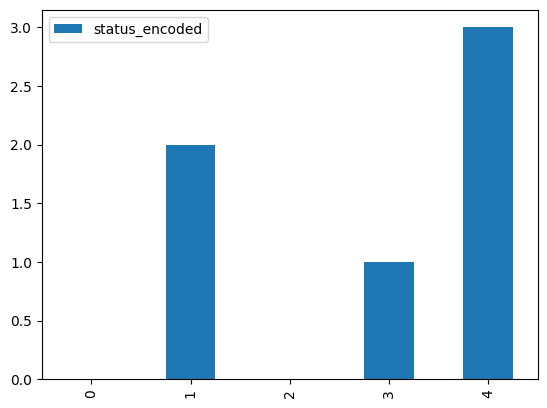

In [12]:
encoder1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded= encoder1.fit_transform(X_train)
X_test_encoded = encoder1.transform(X_test)
df.head().plot(kind='bar')
plt.show()


In [13]:
encoder1.inverse_transform(X_train_encoded)

array([['2023-10-15', 'Video',
        'Add subtitles to a movie trailer in Arabic.',
        'RTL subtitle burning + synchronization.', '$50'],
       ['2023-11-10', 'Design',
        'Design a loyalty card for a coffee shop.',
        'Print Design: Front and back layout + bleed setup.', '$70'],
       ['2023-09-21', 'Web Dev',
        'Custom JavaScript calculator for a mortgage website.',
        'JS Script development, responsive styling, and embedding.',
        '$600'],
       ['2023-10-05', 'Design',
        'Design a book cover for a sci-fi novel.',
        'Premium Cover Art: Typography and stock manipulation.', '$300'],
       ['2023-10-26', 'Video',
        'Create an intro animation for Twitch stream.',
        'Motion Graphics: 5-second loop with transparent background.',
        '$200'],
       ['2023-09-12', 'Copywriting',
        'Write a sales landing page for a new fitness course.',
        'Direct response copywriting. Focus on conversion. 2 revisions.',
        '$5

In [17]:
df.drop(columns ='date', axis = 1, inplace = True)

In [18]:
df.head()

,sector,client_request,commercial_proposal,budget_est,status,status_encoded
0,Web Dev,I need a WordPress landing page for my flower ...,Turnkey WP site + hosting setup + 1h training.,$800,Accepted,0
1,Design,Need a minimalist logo for a tech startup call...,"3 logo concepts, vector files, and favicon inc...",$450,Pending,2
2,Translation,Translate a 5-page legal contract from English...,Certified translation by a native jurist. 48h ...,$0.15/word,Accepted,0
3,Content,Write 4 SEO-optimized articles about 'Solar En...,Content Pack: Keyword research + 4 articles + ...,$600,Negotiating,1
4,Data,Scrape email addresses from 500 LinkedIn profi...,Lead generation service: formatted CSV deliver...,$250,Rejected,3


In [ ]:
df_encoded = pd.get_dummies(df, columns=['sector', 'client_request', 'client_request', 'budget_est'])

In [34]:
df_encoded.head()

,commercial_proposal,status,status_encoded,sector_Admin,sector_App Dev,sector_Consulting,sector_Content,sector_Copywriting,sector_Data,sector_Design,...,budget_est_$550,budget_est_$60,budget_est_$600,budget_est_$70,budget_est_$700,budget_est_$750,budget_est_$80,budget_est_$800,budget_est_$90,budget_est_$900
0,Turnkey WP site + hosting setup + 1h training.,Accepted,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,"3 logo concepts, vector files, and favicon inc...",Pending,2,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Certified translation by a native jurist. 48h ...,Accepted,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Content Pack: Keyword research + 4 articles + ...,Negotiating,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,Lead generation service: formatted CSV deliver...,Rejected,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

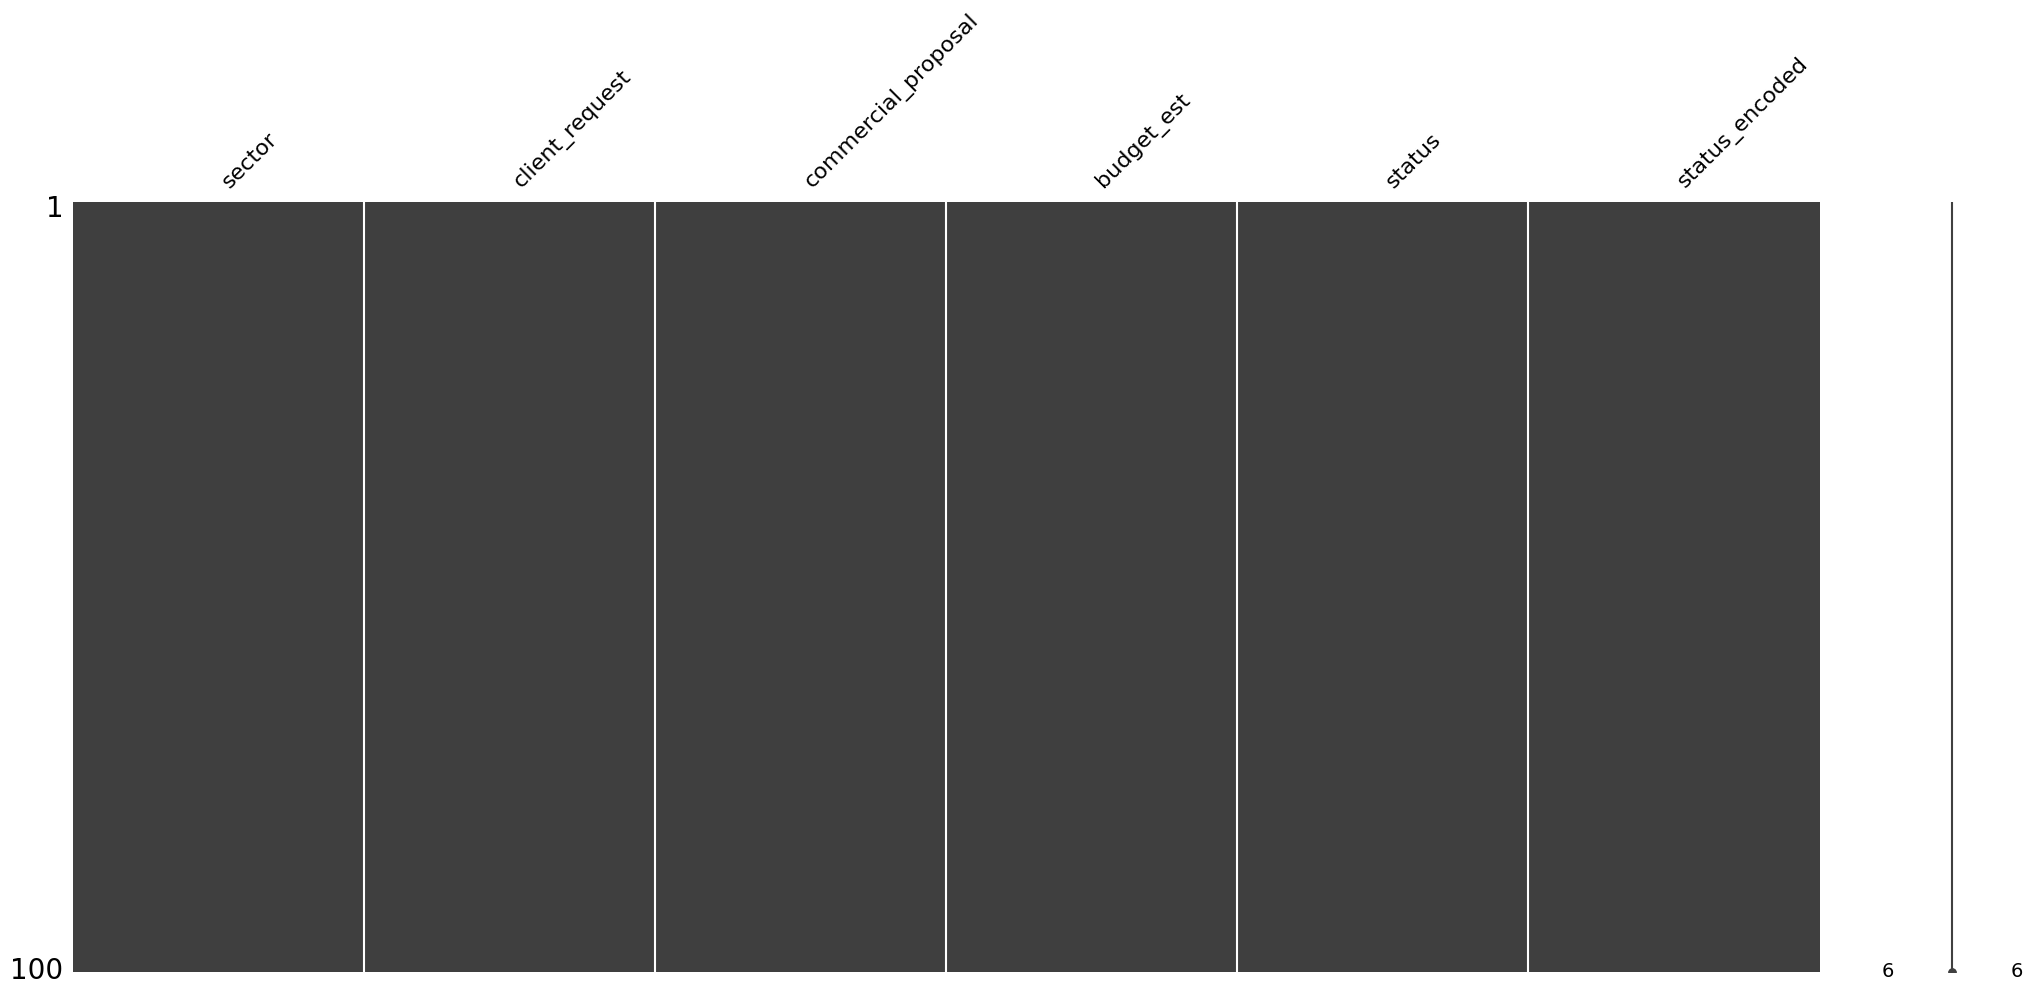

In [35]:
# Plotting 
import missingno as msno
msno.matrix(df)

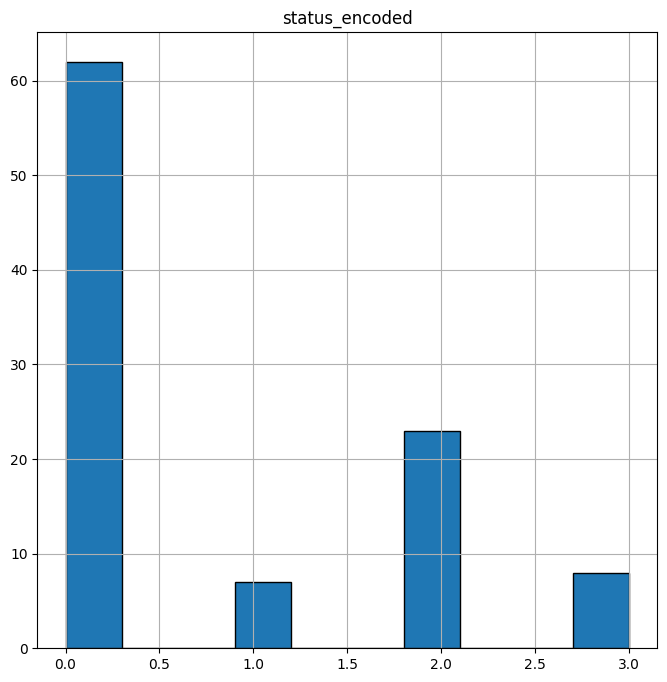

In [37]:
# Creating histograms
df.hist(figsize=(8,8), edgecolor = "black")
plt.show()

In [38]:
df["status"].value_counts()

status
Accepted       62
Pending        23
Rejected        8
Negotiating     7
Name: count, dtype: int64

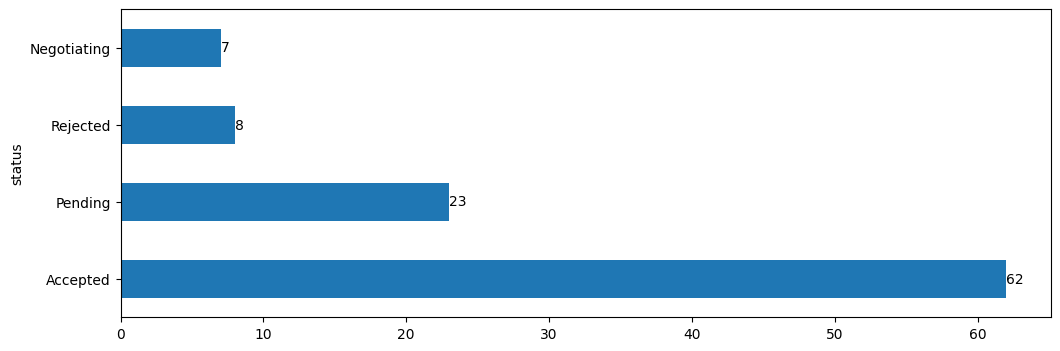

In [39]:
bar=df['status'].value_counts().plot.barh(figsize=(12,4))
bar=bar.bar_label(bar.containers[0], fontsize=10)

### 2. ПРЕДОБРАБОТКА ДАННЫХ (Data Cleaning)

In [ ]:
# Колонка 'budget_est' содержит '$' и иногда текст (e.g. '/word', '/week').
# Нам нужно вытащить чистое число для анализа.

def clean_budget(value):
    # Если значение < 1, это вероятно цена за слово, умножим условно на объем (для графиков)
    # но лучше просто пометить такие данные как "Variable"
    if pd.isna(value):
        return 0
    # Удаляем $ и берем первое числовое значение (float)
    match = re.search(r"(\d+(\.\d+)?)", str(value))
    if match:
        return float(match.group(1))
    return 0

In [42]:
# Создаем числовую колонку для анализа
df['budget_numeric'] = df['budget_est'].apply(clean_budget)
# Флаг для тех сделок, где бюджет за единицу (word/week)
df['is_variable_rate'] = df['budget_est'].astype(str).str.contains('/word|/week', na=False)
df.head()

,sector,client_request,commercial_proposal,budget_est,status,status_encoded,budget_numeric,is_variable_rate
0,Web Dev,I need a WordPress landing page for my flower ...,Turnkey WP site + hosting setup + 1h training.,$800,Accepted,0,800.00,False
1,Design,Need a minimalist logo for a tech startup call...,"3 logo concepts, vector files, and favicon inc...",$450,Pending,2,450.00,False
2,Translation,Translate a 5-page legal contract from English...,Certified translation by a native jurist. 48h ...,$0.15/word,Accepted,0,0.15,True
3,Content,Write 4 SEO-optimized articles about 'Solar En...,Content Pack: Keyword research + 4 articles + ...,$600,Negotiating,1,600.00,False
4,Data,Scrape email addresses from 500 LinkedIn profi...,Lead generation service: formatted CSV deliver...,$250,Rejected,3,250.00,False


In [43]:
# Оцениваем пропуски
missing_values = df.isnull().sum()
print("\n=== Пропущенные значения ===")
print(missing_values[missing_values > 0])


=== Пропущенные значения ===
Series([], dtype: int64)


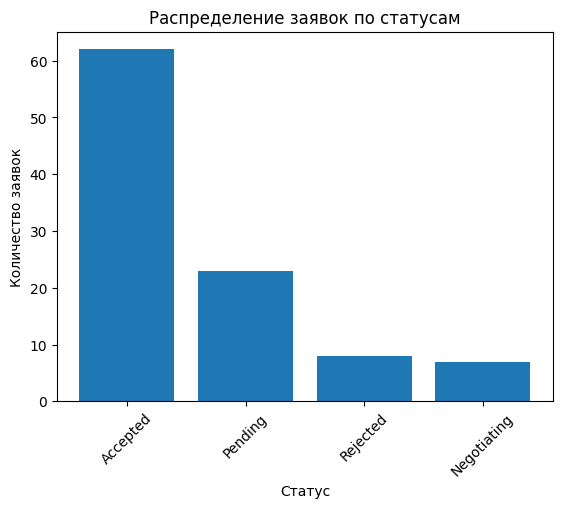

In [45]:
status_counts = df['status'].value_counts()

plt.figure()
plt.bar(status_counts.index, status_counts.values)
plt.title("Распределение заявок по статусам")
plt.xlabel("Статус")
plt.ylabel("Количество заявок")
plt.xticks(rotation=45)
plt.show()


<Figure size 640x480 with 0 Axes>

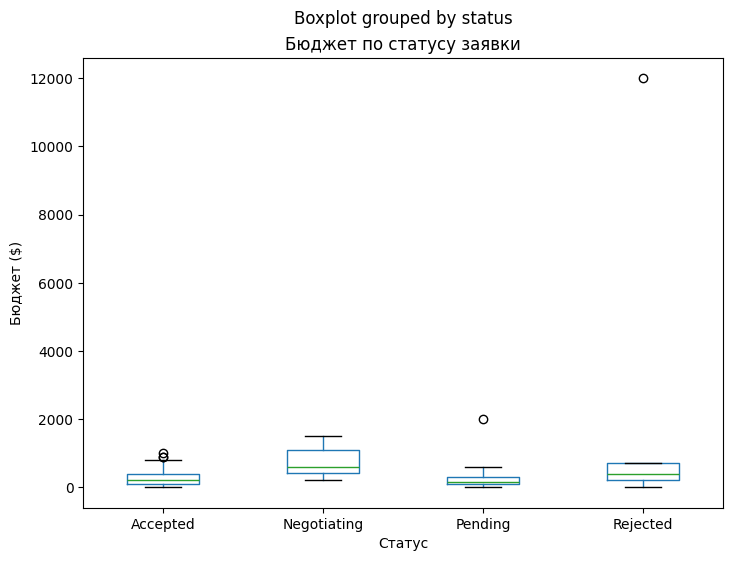

In [47]:
plt.figure()
boxplot = df.boxplot(column ='budget_numeric', by='status', grid=False, figsize=(8,6))
plt.title("Бюджет по статусу заявки")
plt.xlabel("Статус")
plt.ylabel("Бюджет ($)")

plt.show()

### Обучение и валидация моделей

In [49]:
model = LogisticRegression(max_iter=1000)
params_grid = {
    'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, params_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [ ]:
best_model = grid_search.best_estimator_
best_model  

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [73]:
model = LogisticRegression(max_iter=1000, C=grid_search.best_params_['C'])
model.fit(X_train_encoded, y_train)
model.score(X_train_encoded, y_train)

0.625

In [74]:
metrics.roc_auc_score(y_test, model.predict_proba(X_test_encoded), multi_class='ovr')

0.5811443820949432